In [18]:
%matplotlib inline

import pandas as pd
import tensorflow as tf
import numpy as np
import math

from IPython import display
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

## Task #1: Examine Data
---

In [2]:
# Load data
california_housing_dataframe = shuffle(pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=","))

# Preprocess data
from mlcclib import preprocess_chd

training_observations = preprocess_chd("features", california_housing_dataframe.head(12000))
training_targets = preprocess_chd("targets", california_housing_dataframe.head(12000))

validation_observations = preprocess_chd("features", california_housing_dataframe.head(5000))
validation_targets = preprocess_chd("targets", california_housing_dataframe.head(5000))

### Training data

In [3]:
print("Features")
display.display(training_observations.describe())

print("\nTargets")
display.display(training_targets.describe())

Features


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2647.5,540.3,1429.8,501.7,3.9,2.0
std,2.1,2.0,12.6,2202.7,429.2,1155.3,391.0,1.9,1.1
min,32.5,-124.3,1.0,11.0,3.0,3.0,2.0,0.5,0.0
25%,33.9,-121.8,18.0,1460.0,295.0,788.0,280.8,2.6,1.5
50%,34.2,-118.5,29.0,2119.0,433.0,1166.0,408.0,3.5,1.9
75%,37.7,-118.0,37.0,3150.0,646.2,1718.0,603.0,4.8,2.3
max,41.9,-114.3,52.0,37937.0,5471.0,35682.0,5189.0,15.0,55.2



Targets


,median_house_value
count,12000.0
mean,207.3
std,116.0
min,15.0
25%,119.6
50%,179.8
75%,265.1
max,500.0


### Validation Data

In [4]:
print("Features")
display.display(validation_observations.describe())

print("\nTargets")
display.display(validation_targets.describe())

Features


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.5,2695.6,550.6,1448.3,510.4,3.9,2.0
std,2.1,2.0,12.6,2245.7,439.1,1142.3,397.9,1.9,1.3
min,32.5,-124.2,1.0,15.0,3.0,8.0,3.0,0.5,0.0
25%,33.9,-121.8,18.0,1468.8,297.0,792.0,282.0,2.6,1.5
50%,34.3,-118.5,29.0,2131.0,437.0,1172.5,410.0,3.6,1.9
75%,37.7,-118.0,37.0,3216.0,662.0,1743.8,620.0,4.8,2.3
max,41.9,-114.5,52.0,37937.0,5471.0,16122.0,5189.0,15.0,55.2



Targets


,median_house_value
count,5000.0
mean,207.0
std,115.4
min,15.0
25%,119.6
50%,180.9
75%,265.2
max,500.0


## Task #2: Plot Lat/Lon vs. Median House Value
---

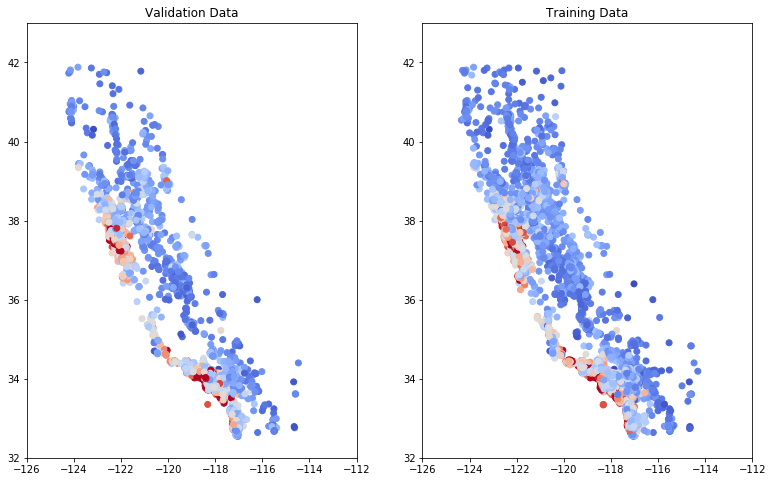

In [5]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_autoscalex_on(False)
ax.set_ylim([32, 43])
ax.set_xlim([-126, -112])

plt.scatter(
    validation_observations["longitude"],
    validation_observations["latitude"],
    cmap="coolwarm",
    c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max()
)

ax = plt.subplot(1, 2, 2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_autoscalex_on(False)
ax.set_ylim([32, 43])
ax.set_xlim([-126, -112])

plt.scatter(
    training_observations["longitude"],
    training_observations["latitude"],
    cmap="coolwarm",
    c=training_targets["median_house_value"] / training_targets["median_house_value"].max()
)

plt.show()

## Task 4: Train & Evaluate a Model
---

In [6]:
from mlcclib import linear_inputfunc, construct_feature_cols, train_model
help(linear_inputfunc)
help(construct_feature_cols)
help(train_model)

Help on function linear_inputfunc in module mlcclib.mlcclib:

linear_inputfunc(features, targets, batch_sz=1, shuffle=True, num_epochs=None)
    :param features: pandas df of features
    :param targets: pandas df of targets
    :param batch_sz: Size of batches passed to the model
    :param shuffle: Whether to shuffle the data
    :param num_epochs: Repeat count; None = indefinitely
    :return: tuple of (features, labels) for the next data batch

Help on function construct_feature_cols in module mlcclib.mlcclib:

construct_feature_cols(input_features)
    :param input_features: Names of numerical input features to use
    :return: A set of corresponding feature columns

Help on function train_model in module mlcclib.train_model:

train_model(learning_rate, steps, batch_sz, training_observations, training_targets, validation_observations, validation_targets)
    :param learning_rate: float, the learning rate
    :param steps: int, the total number of training steps (fwd & bckwd pass o

RMSE (on training data):


Period: 0	Loss: 217.41


Period: 1	Loss: 199.74


Period: 2	Loss: 187.14


Period: 3	Loss: 176.98


Period: 4	Loss: 170.67


Period: 5	Loss: 168.55


Period: 6	Loss: 167.29


Period: 7	Loss: 167.37


Period: 8	Loss: 168.55


Period: 9	Loss: 168.90


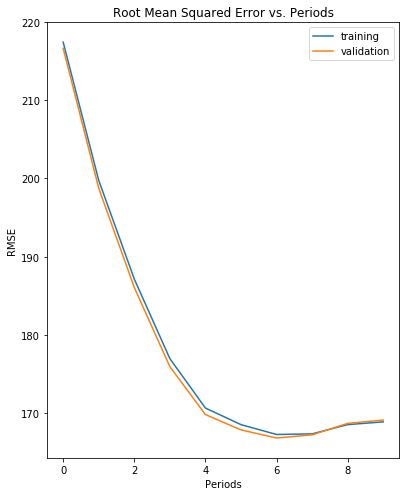

In [10]:
learning_rate = 0.00003
steps = 500
batch_sz = 5

linear_regressor, calibration_data = train_model(
    learning_rate,
    steps,
    batch_sz,
    training_observations,
    training_targets,
    validation_observations,
    validation_targets
)

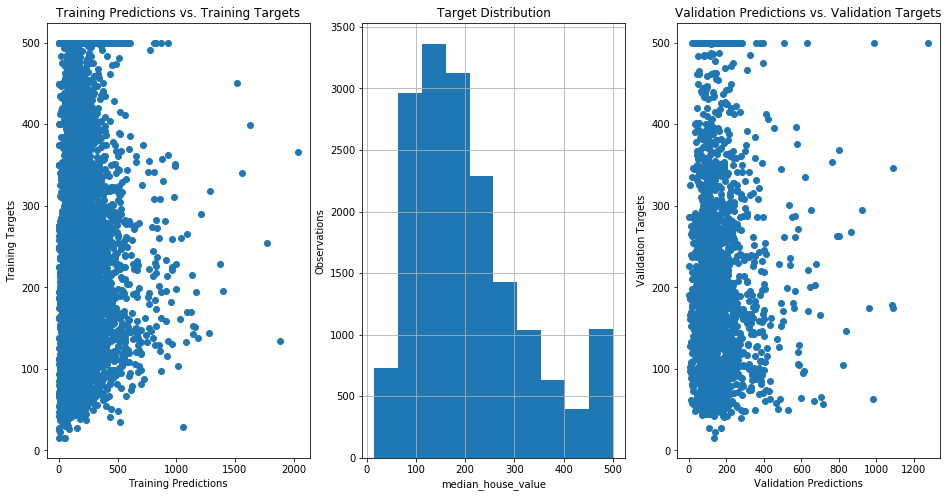

In [11]:
# Plot the predictions vs targets
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.title("Training Predictions vs. Training Targets")
plt.xlabel("Training Predictions")
plt.ylabel("Training Targets")
plt.scatter(calibration_data["training_predictions"], training_targets)

plt.subplot(1, 3, 2)
plt.title("Target Distribution")
plt.xlabel("median_house_value")
plt.ylabel("Observations")
(california_housing_dataframe["median_house_value"] / 1000.0).hist()

plt.subplot(1, 3, 3)
plt.title("Validation Predictions vs. Validation Targets")
plt.xlabel("Validation Predictions")
plt.ylabel("Validation Targets")
plt.scatter(calibration_data["validation_predictions"].sample(5000), validation_targets)

plt.show()

IndexError: tuple index out of range

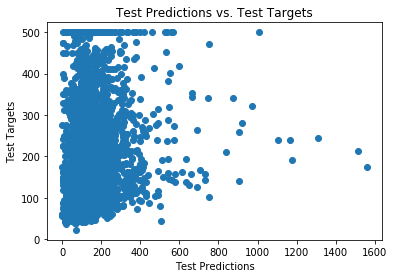

In [ ]:
# Test
california_housing_test_data = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
test_features = preprocess_chd("features", california_housing_test_data)
test_targets = preprocess_chd("targets", california_housing_test_data)

predict_test_input_func = lambda: linear_inputfunc(
    test_features,
    test_targets["median_house_value"],
    shuffle=False,
    num_epochs=1
)

test_predictions = linear_regressor.predict(predict_test_input_func)
test_predictions = np.array([item["predictions"][0] for item in test_predictions])

plt.title("Test Predictions vs. Test Targets")
plt.xlabel("Test Predictions")
plt.ylabel("Test Targets")
plt.scatter(test_predictions, test_targets)

root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(test_predictions, test_targets))

print("RMSE on test data: {:.2f}".format(root_mean_squared_error))

plt.show()